In [ ]:
# Set Random Seeds
import numpy as np
import pandas as pd
import tensorflow as tf
import random

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)


In [ ]:
data_lstm = pd.read_csv('M6_time_series.csv')

In [ ]:
data_lstm.head(10)

,date,hour,open,close,high,low,volume_24h,market_cap,market_dominance,circulating_supply,sentiment,social_dominance,percent_change,rolling_avg_7h,rolling_avg_24h,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5
0,2024-05-16,04:00:00,65847.67,65847.67,65847.67,65824.13,4.195987e+10,1.297128e+12,54.313363,19698925,81,10.377967,0.000000,66037.248571,64531.166250,NaN,NaN,NaN,NaN,NaN
1,2024-05-16,05:00:00,65831.29,65831.29,65831.29,65791.53,4.200353e+10,1.296806e+12,54.422908,19698925,80,10.164741,0.000000,65997.244286,64695.758750,65847.67,NaN,NaN,NaN,NaN
2,2024-05-16,06:00:00,65796.99,65932.65,65932.65,65685.56,4.240159e+10,1.298802e+12,54.547028,19698925,80,10.290927,0.206180,65950.287143,64863.812500,65831.29,65847.67,NaN,NaN,NaN
3,2024-05-16,07:00:00,65958.18,66163.45,66163.45,65928.65,4.273872e+10,1.303352e+12,54.634970,19698975,80,10.289428,0.311212,65956.302857,65029.947917,65932.65,65831.29,65847.67,NaN,NaN
4,2024-05-16,08:00:00,66163.86,66265.74,66265.74,66116.26,4.294354e+10,1.305367e+12,54.584727,19698975,81,10.196232,0.153981,66001.164286,65201.436667,66163.45,65932.65,65831.29,65847.67,NaN
5,2024-05-16,09:00:00,66301.62,66354.90,66354.90,66135.39,4.265883e+10,1.307124e+12,54.653710,19698975,81,10.174880,0.080360,66063.904286,65347.365417,66265.74,66163.45,65932.65,65831.29,65847.67
6,2024-05-16,10:00:00,66175.31,66175.31,66175.31,66126.67,4.161015e+10,1.303588e+12,54.449102,19699012,81,10.227890,0.000000,66081.572857,65492.912917,66354.90,66265.74,66163.45,65932.65,65831.29
7,2024-05-16,11:00:00,66174.83,66303.01,66303.01,66046.99,4.117324e+10,1.306104e+12,54.749854,19699012,81,10.385979,0.193699,66146.621429,65652.186667,66175.31,66354.90,66265.74,66163.45,65932.65
8,2024-05-16,12:00:00,66240.82,66240.82,66240.82,65965.27,3.945735e+10,1.304879e+12,54.499585,19699012,81,10.608516,0.000000,66205.125714,65758.272500,66303.01,66175.31,66354.90,66265.74,66163.45
9,2024-05-16,13:00:00,66043.45,66294.49,66294.49,65822.85,3.739842e+10,1.305940e+12,54.925711,19699081,81,10.649963,0.380113,66256.817143,65847.379167,66240.82,66303.01,66175.31,66354.90,66265.74


In [ ]:
data_lstm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394 entries, 0 to 4393
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                4394 non-null   object 
 1   hour                4394 non-null   object 
 2   open                4394 non-null   float64
 3   close               4394 non-null   float64
 4   high                4394 non-null   float64
 5   low                 4394 non-null   float64
 6   volume_24h          4394 non-null   float64
 7   market_cap          4394 non-null   float64
 8   market_dominance    4394 non-null   float64
 9   circulating_supply  4394 non-null   int64  
 10  sentiment           4394 non-null   int64  
 11  social_dominance    4394 non-null   float64
 12  percent_change      4394 non-null   float64
 13  rolling_avg_7h      4394 non-null   float64
 14  rolling_avg_24h     4394 non-null   float64
 15  close_lag_1         4393 non-null   float64
 16  close_

In [ ]:
# Drop rows with missing values in lagged features
data_lstm_cleaned = data_lstm.dropna(subset=['close_lag_1', 'close_lag_2', 'close_lag_3', 'close_lag_4', 'close_lag_5'])

# Verify if there are any remaining missing values
missing_values_summary = data_lstm_cleaned.isnull().sum()

# Display the cleaned dataset structure
data_lstm_cleaned.info(), missing_values_summary


<class 'pandas.core.frame.DataFrame'>
Index: 4389 entries, 5 to 4393
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                4389 non-null   object 
 1   hour                4389 non-null   object 
 2   open                4389 non-null   float64
 3   close               4389 non-null   float64
 4   high                4389 non-null   float64
 5   low                 4389 non-null   float64
 6   volume_24h          4389 non-null   float64
 7   market_cap          4389 non-null   float64
 8   market_dominance    4389 non-null   float64
 9   circulating_supply  4389 non-null   int64  
 10  sentiment           4389 non-null   int64  
 11  social_dominance    4389 non-null   float64
 12  percent_change      4389 non-null   float64
 13  rolling_avg_7h      4389 non-null   float64
 14  rolling_avg_24h     4389 non-null   float64
 15  close_lag_1         4389 non-null   float64
 16  close_lag_2

(None,
 date                  0
 hour                  0
 open                  0
 close                 0
 high                  0
 low                   0
 volume_24h            0
 market_cap            0
 market_dominance      0
 circulating_supply    0
 sentiment             0
 social_dominance      0
 percent_change        0
 rolling_avg_7h        0
 rolling_avg_24h       0
 close_lag_1           0
 close_lag_2           0
 close_lag_3           0
 close_lag_4           0
 close_lag_5           0
 dtype: int64)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select features to normalize (close and lagged features)
features_to_normalize = ['close', 'close_lag_1', 'close_lag_2', 'close_lag_3', 'close_lag_4', 'close_lag_5']

# Initialize MinMaxScaler and normalize the selected features
scaler = MinMaxScaler()
data_lstm_cleaned[features_to_normalize] = scaler.fit_transform(data_lstm_cleaned[features_to_normalize])

# Verify normalization by checking the first few rows of the normalized data
data_lstm_cleaned[features_to_normalize].head()


<ipython-input-9-8574cd945e72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lstm_cleaned[features_to_normalize] = scaler.fit_transform(data_lstm_cleaned[features_to_normalize])


,close,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5
5,0.381932,0.379855,0.377472,0.372095,0.369734,0.370116
6,0.377748,0.381932,0.379855,0.377472,0.372095,0.369734
7,0.380723,0.377748,0.381932,0.379855,0.377472,0.372095
8,0.379274,0.380723,0.377748,0.381932,0.379855,0.377472
9,0.380524,0.379274,0.380723,0.377748,0.381932,0.379855


In [ ]:
data_lstm_cleaned.head()

,date,hour,open,close,high,low,volume_24h,market_cap,market_dominance,circulating_supply,sentiment,social_dominance,percent_change,rolling_avg_7h,rolling_avg_24h,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5
5,2024-05-16,09:00:00,66301.62,0.381932,66354.90,66135.39,4.265883e+10,1.307124e+12,54.653710,19698975,81,10.174880,0.080360,66063.904286,65347.365417,0.379855,0.377472,0.372095,0.369734,0.370116
6,2024-05-16,10:00:00,66175.31,0.377748,66175.31,66126.67,4.161015e+10,1.303588e+12,54.449102,19699012,81,10.227890,0.000000,66081.572857,65492.912917,0.381932,0.379855,0.377472,0.372095,0.369734
7,2024-05-16,11:00:00,66174.83,0.380723,66303.01,66046.99,4.117324e+10,1.306104e+12,54.749854,19699012,81,10.385979,0.193699,66146.621429,65652.186667,0.377748,0.381932,0.379855,0.377472,0.372095
8,2024-05-16,12:00:00,66240.82,0.379274,66240.82,65965.27,3.945735e+10,1.304879e+12,54.499585,19699012,81,10.608516,0.000000,66205.125714,65758.272500,0.380723,0.377748,0.381932,0.379855,0.377472
9,2024-05-16,13:00:00,66043.45,0.380524,66294.49,65822.85,3.739842e+10,1.305940e+12,54.925711,19699081,81,10.649963,0.380113,66256.817143,65847.379167,0.379274,0.380723,0.377748,0.381932,0.379855


In [ ]:
data_lstm_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4389 entries, 5 to 4393
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                4389 non-null   object 
 1   hour                4389 non-null   object 
 2   open                4389 non-null   float64
 3   close               4389 non-null   float64
 4   high                4389 non-null   float64
 5   low                 4389 non-null   float64
 6   volume_24h          4389 non-null   float64
 7   market_cap          4389 non-null   float64
 8   market_dominance    4389 non-null   float64
 9   circulating_supply  4389 non-null   int64  
 10  sentiment           4389 non-null   int64  
 11  social_dominance    4389 non-null   float64
 12  percent_change      4389 non-null   float64
 13  rolling_avg_7h      4389 non-null   float64
 14  rolling_avg_24h     4389 non-null   float64
 15  close_lag_1         4389 non-null   float64
 16  close_lag_2

In [ ]:
# Define features and target for LSTM
features = ['close_lag_1', 'close_lag_2', 'close_lag_3', 'close_lag_4', 'close_lag_5']
target = 'close'

# Create sequences for LSTM
def create_lstm_sequences(data, features, target, n_time_steps):
    X, y = [], []
    for i in range(len(data) - n_time_steps):
        X.append(data[features].iloc[i:i + n_time_steps].values)
        y.append(data[target].iloc[i + n_time_steps])
    return np.array(X), np.array(y)

# Generate LSTM sequences
n_time_steps = 5  # Number of time steps for each sequence
X_lstm, y_lstm = create_lstm_sequences(data_lstm_cleaned, features, target, n_time_steps)

# Split the sequences into training and testing sets
from sklearn.model_selection import train_test_split

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=SEED)

# Split the sequences into training and testing sets
train_size = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# Display the shapes of the generated data
X_train_lstm.shape, X_test_lstm.shape, y_train_lstm.shape, y_test_lstm.shape


((3507, 5, 5), (877, 5, 5), (3507,), (877,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model architecture
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for predicting the 'close' price
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the LSTM model on the training data
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1
)

# Display training history for inspection
history.history


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 7.9226e-04 - val_mse: 7.9226e-04
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 7.6497e-04 - val_mse: 7.6497e-04
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 7.5915e-04 - val_mse: 7.5915e-04
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 5.6745e-04 - val_mse: 5.6745e-04
Epoch 9/50
110/110 ━━

{'loss': [0.012892084196209908,
  0.0018070859368890524,
  0.0015707170823588967,
  0.0013624329585582018,
  0.0012874773237854242,
  0.0012005186872556806,
  0.0010608411394059658,
  0.001084087765775621,
  0.001022274256683886,
  0.0009451107471249998,
  0.0008950073970481753,
  0.0008873149054124951,
  0.0008700889302417636,
  0.0007973162573762238,
  0.0007528791902586818,
  0.0007080429350025952,
  0.0006974178249947727,
  0.0006401228019967675,
  0.0006778901442885399,
  0.0006059488514438272,
  0.0005843239487148821,
  0.0006218955968506634,
  0.0005833696341142058,
  0.0005536258686333895,
  0.0005313464207574725,
  0.0005566933541558683,
  0.0005254243151284754,
  0.0005453761550597847,
  0.0005136113613843918,
  0.0005218218429945409,
  0.0005248130764812231,
  0.0005002098041586578,
  0.00048822100507095456,
  0.00048594578402116895,
  0.0005153378006070852,
  0.0005161489243619144,
  0.00048707949463278055,
  0.0005030808970332146,
  0.0004948204150423408,
  0.0004929239512

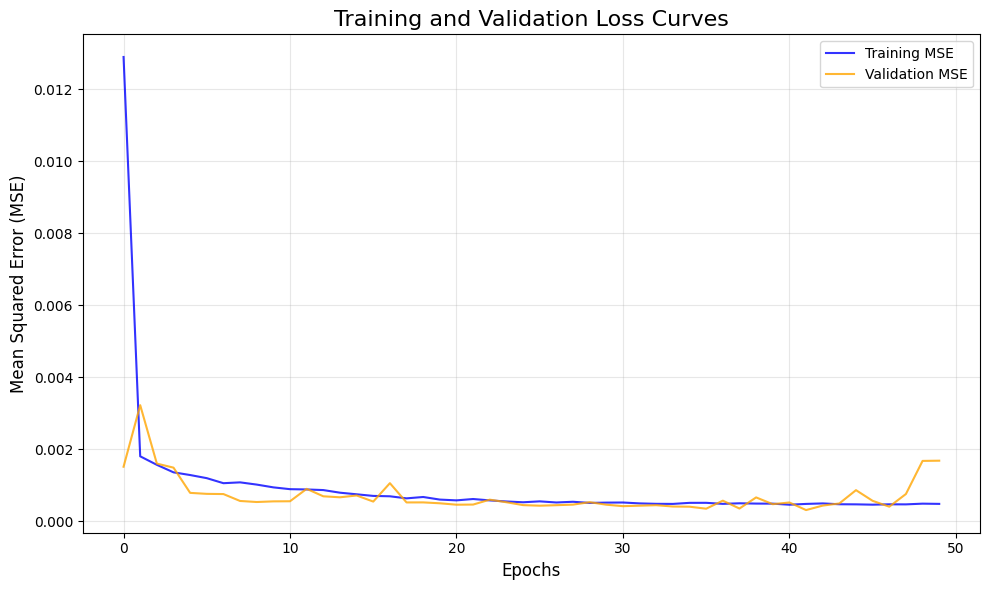

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE', color='blue', alpha=0.8)
plt.plot(history.history['val_mse'], label='Validation MSE', color='orange', alpha=0.8)
plt.title("Training and Validation Loss Curves", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
y_pred_lstm = model.predict(X_test_lstm)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
# Initialize a separate scaler for the 'close' column
target_scaler = MinMaxScaler()

# Fit the scaler on the 'close' column only
target_scaler.fit(data_lstm_cleaned[['close']])

# Rescale the predictions and actual test values using the target scaler
y_pred_rescaled = target_scaler.inverse_transform(y_pred_lstm)
y_test_rescaled = target_scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Calculate RMSE for the test set
from sklearn.metrics import mean_squared_error
rmse_lstm_fixed = mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False)

# Display the RMSE
rmse_lstm_fixed


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.04105546207255196

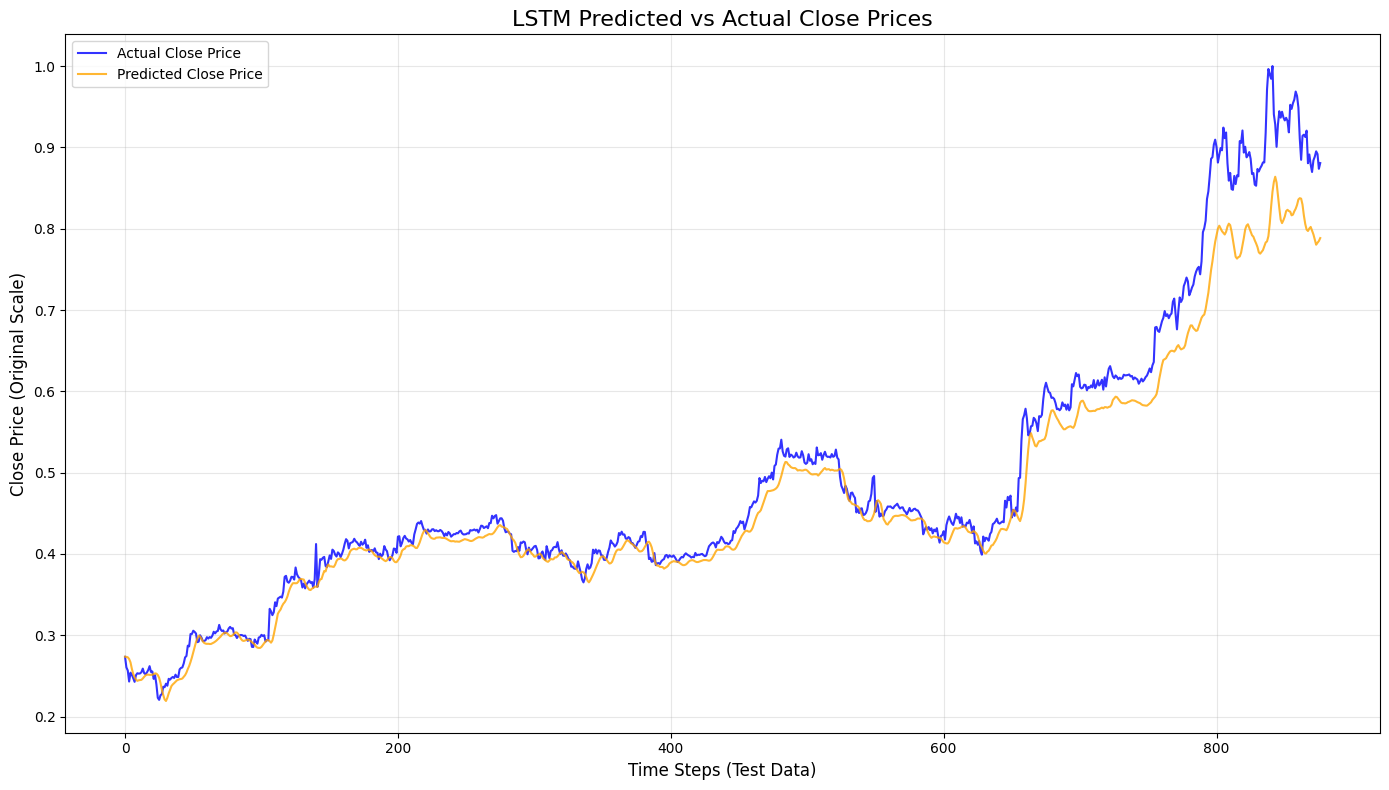

In [ ]:
# Plot the predicted vs actual 'close' prices
plt.figure(figsize=(14, 8))
plt.plot(y_test_rescaled, label="Actual Close Price", color='blue', alpha=0.8)
plt.plot(y_pred_rescaled, label="Predicted Close Price", color='orange', alpha=0.8)
plt.title("LSTM Predicted vs Actual Close Prices", fontsize=16)
plt.xlabel("Time Steps (Test Data)", fontsize=12)
plt.ylabel("Close Price (Original Scale)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Define additional features to incorporate
additional_features = ['volume_24h', 'market_cap', 'rolling_avg_7h', 'rolling_avg_24h', 'sentiment']
all_features = features + additional_features  # Combine lagged features with additional features

# Normalize the new set of features using MinMaxScaler
scaler_all_features = MinMaxScaler()
data_lstm_cleaned[all_features + [target]] = scaler_all_features.fit_transform(data_lstm_cleaned[all_features + [target]])

# Create sequences with the new features
X_lstm_full, y_lstm_full = create_lstm_sequences(data_lstm_cleaned, all_features, target, n_time_steps)

# Split the sequences into training and testing sets
from sklearn.model_selection import train_test_split

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=SEED)

# Split into training and testing sets
train_size_full = int(0.8 * len(X_lstm_full))
X_train_lstm_full, X_test_lstm_full = X_lstm_full[:train_size_full], X_lstm_full[train_size_full:]
y_train_lstm_full, y_test_lstm_full = y_lstm_full[:train_size_full], y_lstm_full[train_size_full:]

# Display the new shapes after incorporating additional features
X_train_lstm_full.shape, X_test_lstm_full.shape, y_train_lstm_full.shape, y_test_lstm_full.shape


<ipython-input-18-c94acde624c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lstm_cleaned[all_features + [target]] = scaler_all_features.fit_transform(data_lstm_cleaned[all_features + [target]])


((3507, 5, 10), (877, 5, 10), (3507,), (877,))

In [ ]:
# Debug and verify the dataset structure after adding additional features
# Check if the features and target are correctly included in the dataset
debug_info = {
    'all_features_in_data': all(feature in data_lstm_cleaned.columns for feature in all_features),
    'target_in_data': target in data_lstm_cleaned.columns,
    'sample_data': data_lstm_cleaned[all_features + [target]].head()
}

debug_info

{'all_features_in_data': True,
 'target_in_data': True,
 'sample_data':    close_lag_1  close_lag_2  close_lag_3  close_lag_4  close_lag_5  \
 5     0.379855     0.377472     0.372095     0.369734     0.370116   
 6     0.381932     0.379855     0.377472     0.372095     0.369734   
 7     0.377748     0.381932     0.379855     0.377472     0.372095   
 8     0.380723     0.377748     0.381932     0.379855     0.377472   
 9     0.379274     0.380723     0.377748     0.381932     0.379855   
 
    volume_24h  market_cap  rolling_avg_7h  rolling_avg_24h  sentiment  \
 5    0.229411    0.377144        0.360123         0.320774    0.73913   
 6    0.222479    0.372992        0.360564         0.324663    0.73913   
 7    0.219591    0.375946        0.362186         0.328918    0.73913   
 8    0.208248    0.374507        0.363645         0.331753    0.73913   
 9    0.194638    0.375754        0.364934         0.334133    0.73913   
 
       close  
 5  0.381932  
 6  0.377748  
 7  0.3807

In [ ]:
# Define an updated LSTM model architecture to handle the additional features
model_updated = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm_full.shape[1], X_train_lstm_full.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for predicting the 'close' price
])

# Compile the updated model
model_updated.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the updated model on the new dataset
history_updated = model_updated.fit(
    X_train_lstm_full, y_train_lstm_full,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm_full, y_test_lstm_full),
    verbose=1
)

# Display training history for the updated model
history_updated.history

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 7.0584e-04 - val_mse: 7.0584e-04
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.8584e-04 - mse: 9.8584e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.6495e-04 - mse: 9.6495e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2

{'loss': [0.00805887021124363,
  0.0017455682391300797,
  0.00127605558373034,
  0.0011696768924593925,
  0.0010721089784055948,
  0.0010431944392621517,
  0.0009625319507904351,
  0.0009847426554188132,
  0.0008485886501148343,
  0.0007703802548348904,
  0.0007742531597614288,
  0.0007264358573593199,
  0.0006710501038469374,
  0.0006207401165738702,
  0.0006225489196367562,
  0.000577435246668756,
  0.0005462303524836898,
  0.00054551922949031,
  0.00046457635471597314,
  0.00044744007755070925,
  0.00045478990068659186,
  0.00041012870497070253,
  0.0004078666679561138,
  0.00040581292705610394,
  0.0003857065748888999,
  0.00039763408130966127,
  0.00038035999750718474,
  0.0003711686294991523,
  0.0003463586908765137,
  0.0003395596577320248,
  0.0003281229001004249,
  0.00032897197525016963,
  0.00034811178920790553,
  0.00034107916872017086,
  0.0003205076791346073,
  0.000312827032757923,
  0.00033016063389368355,
  0.0003166231617797166,
  0.00030437266104854643,
  0.000298323

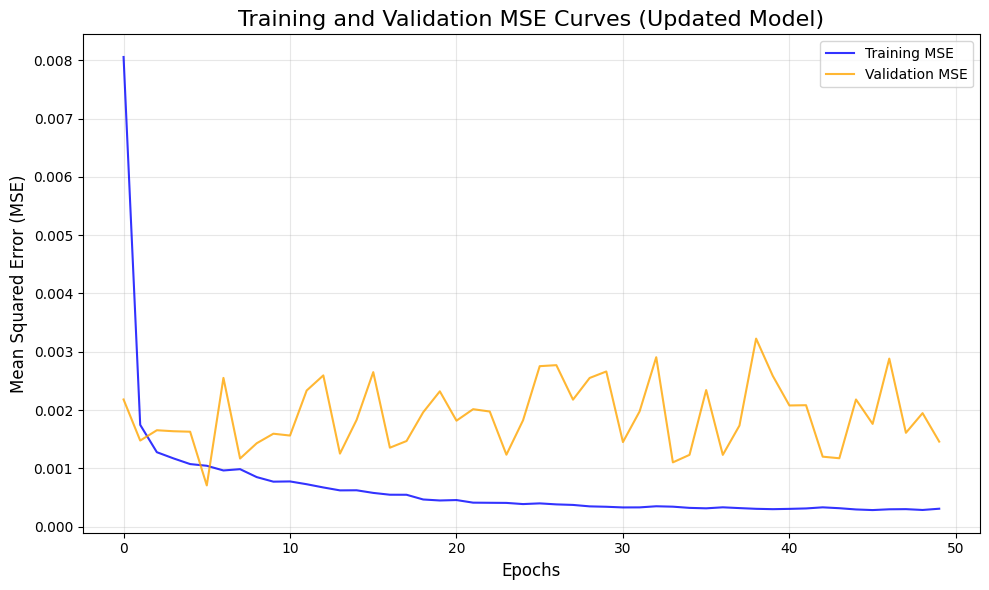

In [ ]:
# Reattempt to plot training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history_updated.history['mse'], label='Training MSE', color='blue', alpha=0.8)
plt.plot(history_updated.history['val_mse'], label='Validation MSE', color='orange', alpha=0.8)
plt.title("Training and Validation MSE Curves (Updated Model)", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Generate predictions on the test set using the updated model
y_pred_lstm_updated = model_updated.predict(X_test_lstm_full)

# Rescale the predictions and actual values back to the original scale using the target scaler
y_pred_rescaled_updated = target_scaler.inverse_transform(y_pred_lstm_updated)
y_test_rescaled_updated = target_scaler.inverse_transform(y_test_lstm_full.reshape(-1, 1))

# Calculate RMSE for the test set
rmse_updated_model = mean_squared_error(y_test_rescaled_updated, y_pred_rescaled_updated, squared=False)

# Display the RMSE
rmse_updated_model


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.03818202242252076

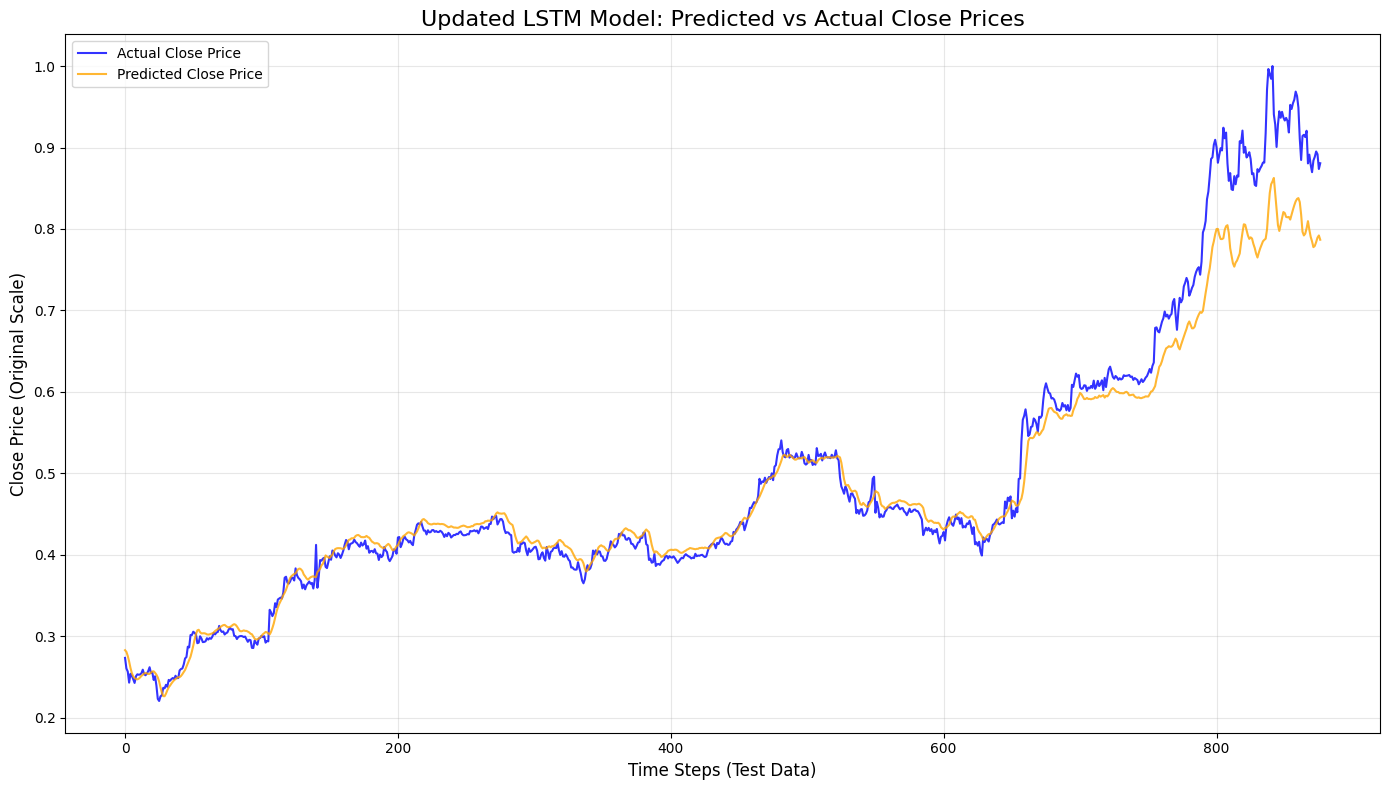

In [ ]:
# Plot predicted vs actual 'close' prices for the updated model
plt.figure(figsize=(14, 8))
plt.plot(y_test_rescaled_updated, label="Actual Close Price", color='blue', alpha=0.8)
plt.plot(y_pred_rescaled_updated, label="Predicted Close Price", color='orange', alpha=0.8)
plt.title("Updated LSTM Model: Predicted vs Actual Close Prices", fontsize=16)
plt.xlabel("Time Steps (Test Data)", fontsize=12)
plt.ylabel("Close Price (Original Scale)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Define a function to compute gradients for feature importance
def compute_gradients(model, inputs, target_output):
    with tf.GradientTape() as tape:
        # Watch the input for gradient computation
        inputs_tensor = tf.convert_to_tensor(inputs, dtype=tf.float32)
        tape.watch(inputs_tensor)
        predictions = model(inputs_tensor)
    # Compute gradients of the target output with respect to inputs
    gradients = tape.gradient(predictions, inputs_tensor)
    return gradients

# Prepare a subset of the test data for gradient computation (to reduce computation time)
X_sample = X_test_lstm_full[:100]  # Use the first 100 samples

# Compute gradients
gradients = compute_gradients(model_updated, X_sample, None)

# Average gradients across time steps and samples to get feature importance
avg_gradients = tf.reduce_mean(tf.abs(gradients), axis=[0, 1]).numpy()

# Map gradients back to features
feature_importance_grad = pd.DataFrame({
    'Feature': all_features,
    'Importance': avg_gradients
}).sort_values(by='Importance', ascending=False)

# Display gradient-based feature importance
feature_importance_grad

,Feature,Importance
6,market_cap,0.102074
0,close_lag_1,0.073530
7,rolling_avg_7h,0.042656
3,close_lag_4,0.035175
1,close_lag_2,0.030629
4,close_lag_5,0.010608
2,close_lag_3,0.007766
8,rolling_avg_24h,0.006690
5,volume_24h,0.006245
9,sentiment,0.005584


In [ ]:
# Generate interaction features for analysis
data_interactions = data_lstm_cleaned.copy()

# Example interactions between key features
data_interactions['market_cap_x_rolling_avg_7h'] = data_interactions['market_cap'] * data_interactions['rolling_avg_7h']
data_interactions['market_cap_x_rolling_avg_24h'] = data_interactions['market_cap'] * data_interactions['rolling_avg_24h']
data_interactions['close_lag_1_x_rolling_avg_7h'] = data_interactions['close_lag_1'] * data_interactions['rolling_avg_7h']
data_interactions['close_lag_1_x_sentiment'] = data_interactions['close_lag_1'] * data_interactions['sentiment']

# List of new features
interaction_features = [
    'market_cap_x_rolling_avg_7h',
    'market_cap_x_rolling_avg_24h',
    'close_lag_1_x_rolling_avg_7h',
    'close_lag_1_x_sentiment'
]

# Normalize interaction features
data_interactions[interaction_features] = scaler_all_features.fit_transform(data_interactions[interaction_features])

# Display the interaction features for analysis
data_interactions[interaction_features]


,market_cap_x_rolling_avg_7h,market_cap_x_rolling_avg_24h,close_lag_1_x_rolling_avg_7h,close_lag_1_x_sentiment
5,0.137282,0.125551,0.137015,0.403596
6,0.135936,0.125675,0.137933,0.405802
7,0.137629,0.128330,0.137036,0.401357
8,0.137655,0.128941,0.138671,0.404518
9,0.138603,0.130299,0.138633,0.402979
...,...,...,...,...
4389,0.816436,0.891094,0.804611,0.773539
4390,0.818957,0.895830,0.805252,0.721949
4391,0.817397,0.890597,0.812767,0.727306
4392,0.798530,0.869906,0.807273,0.724536


In [ ]:
# Add the target column back for correlation analysis
interaction_data_with_target = data_interactions[interaction_features + ['close']]

# Compute correlations of interaction features with the target ('close')
interaction_correlations = interaction_data_with_target.corr()['close'].sort_values(ascending=False)

# Display the correlations
interaction_correlations

,close
close,1.000000
close_lag_1_x_sentiment,0.960195
market_cap_x_rolling_avg_7h,0.945516
close_lag_1_x_rolling_avg_7h,0.945448
market_cap_x_rolling_avg_24h,0.939974


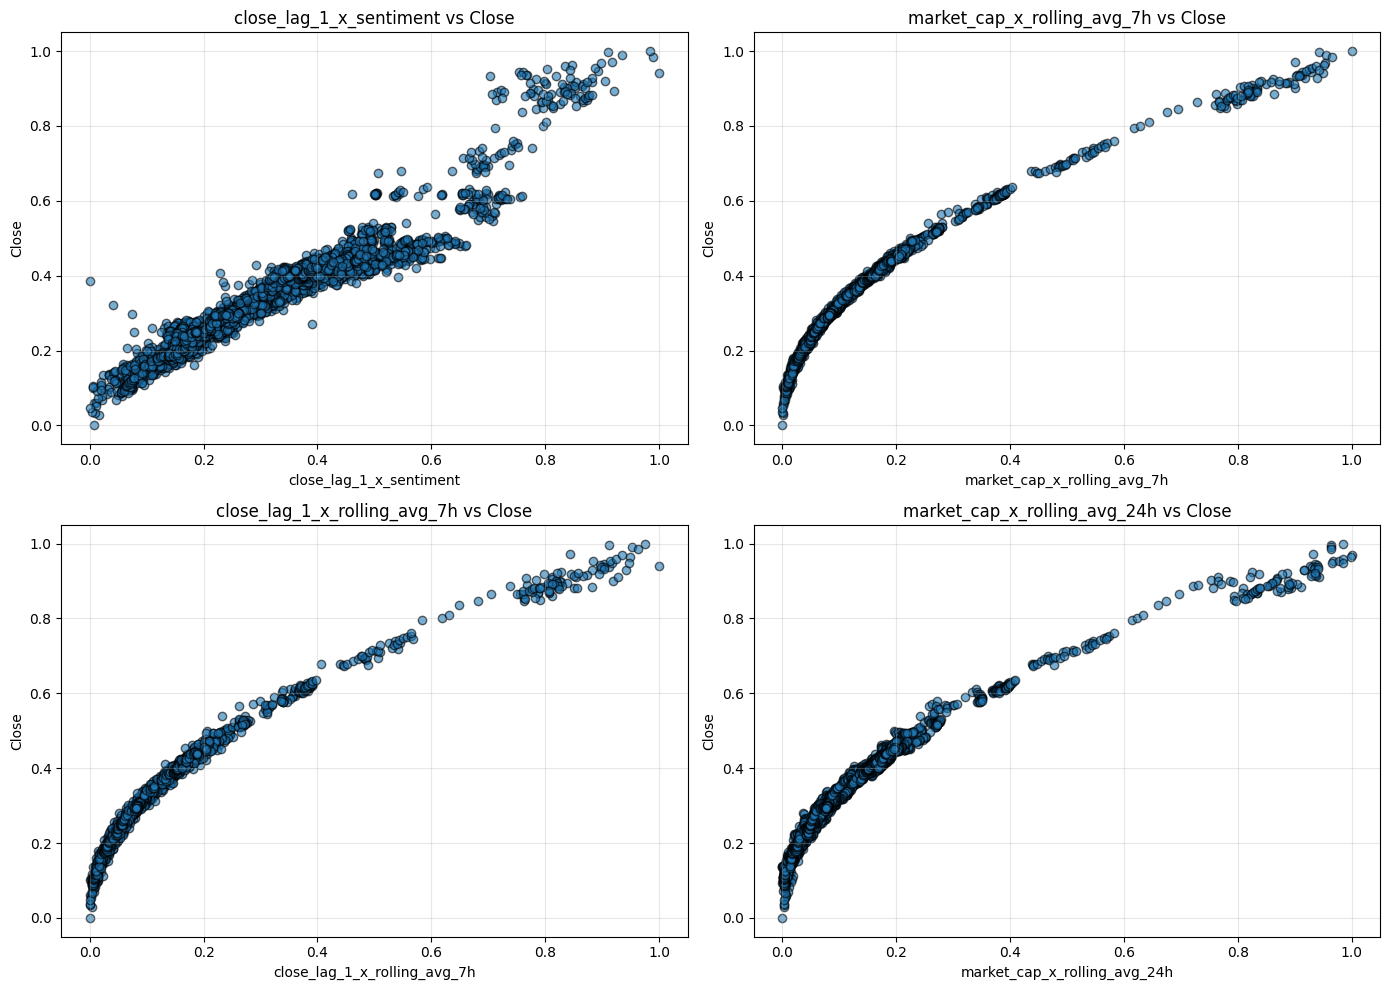

In [ ]:
import matplotlib.pyplot as plt

# Visualize relationships between interaction features and the target ('close')
plt.figure(figsize=(14, 10))

# List of interaction features to visualize
features_to_plot = [
    'close_lag_1_x_sentiment',
    'market_cap_x_rolling_avg_7h',
    'close_lag_1_x_rolling_avg_7h',
    'market_cap_x_rolling_avg_24h'
]

# Create scatter plots
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.scatter(data_interactions[feature], data_interactions['close'], alpha=0.6, edgecolor='black')
    plt.title(f'{feature} vs Close', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Close', fontsize=10)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Add the interaction features to the full feature set
all_features_with_interactions = all_features + interaction_features

# Normalize the updated feature set (if not already done)
data_interactions[all_features_with_interactions + [target]] = scaler_all_features.fit_transform(
    data_interactions[all_features_with_interactions + [target]]
)

# Create sequences with the updated features including interactions
X_lstm_interactions, y_lstm_interactions = create_lstm_sequences(
    data_interactions, all_features_with_interactions, target, n_time_steps
)
# Split the sequences into training and testing sets
from sklearn.model_selection import train_test_split

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=SEED)


# Split into training and testing sets
train_size_interactions = int(0.8 * len(X_lstm_interactions))
X_train_lstm_interactions, X_test_lstm_interactions = X_lstm_interactions[:train_size_interactions], X_lstm_interactions[train_size_interactions:]
y_train_lstm_interactions, y_test_lstm_interactions = y_lstm_interactions[:train_size_interactions], y_lstm_interactions[train_size_interactions:]

# Display the shapes of the updated LSTM dataset
X_train_lstm_interactions.shape, X_test_lstm_interactions.shape, y_train_lstm_interactions.shape, y_test_lstm_interactions.shape

((3507, 5, 14), (877, 5, 14), (3507,), (877,))

In [ ]:
# Define an updated LSTM model architecture to handle the additional interaction features
model_interactions = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm_interactions.shape[1], X_train_lstm_interactions.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for predicting the 'close' price
])

# Compile the updated model
model_interactions.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the updated model on the new dataset
history_interactions = model_interactions.fit(
    X_train_lstm_interactions, y_train_lstm_interactions,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm_interactions, y_test_lstm_interactions),
    verbose=1
)

# Display training history for the model with interactions
history_interactions.history


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 8.6918e-04 - val_mse: 8.6918e-04
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 7.6699e-04 - val_mse: 7.6699e-04
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 5.2016e-04 - val_mse: 5.2016e-04
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.7526e-04 - mse: 9.7526e-04 - val_loss: 4.5751e-04 - val_mse: 4.5751e-04
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.5730e-04 - mse: 9.5730e-04 - val_loss: 7.5792e-04 - val_mse: 7.5792e-04
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.6475e-04 - mse: 8.6475e-04 - val_loss: 5.6984e-04 - val_mse: 5.698

{'loss': [0.011061294004321098,
  0.0014023351250216365,
  0.0011896780924871564,
  0.0010924349771812558,
  0.0010684203589335084,
  0.0009405651944689453,
  0.0009491717210039496,
  0.000882937281858176,
  0.0008276596781797707,
  0.0007721120491623878,
  0.0007878580945543945,
  0.000665249302983284,
  0.0006360559491440654,
  0.0006011395598761737,
  0.0006050918600521982,
  0.0005358592025004327,
  0.0005460348911583424,
  0.0004846712981816381,
  0.0004729014472104609,
  0.00045308549306355417,
  0.00043780929991044104,
  0.00038366540684364736,
  0.00038761537871323526,
  0.0003920431190636009,
  0.00037677650107070804,
  0.00036515193642117083,
  0.0003417084226384759,
  0.0003119660832453519,
  0.00031232391484081745,
  0.0003213814925402403,
  0.00031935377046465874,
  0.0002879342355299741,
  0.00030007725581526756,
  0.0002945297455880791,
  0.0002800553338602185,
  0.00029600292327813804,
  0.00027621776098385453,
  0.00026848548441194,
  0.00027397621306590736,
  0.000276

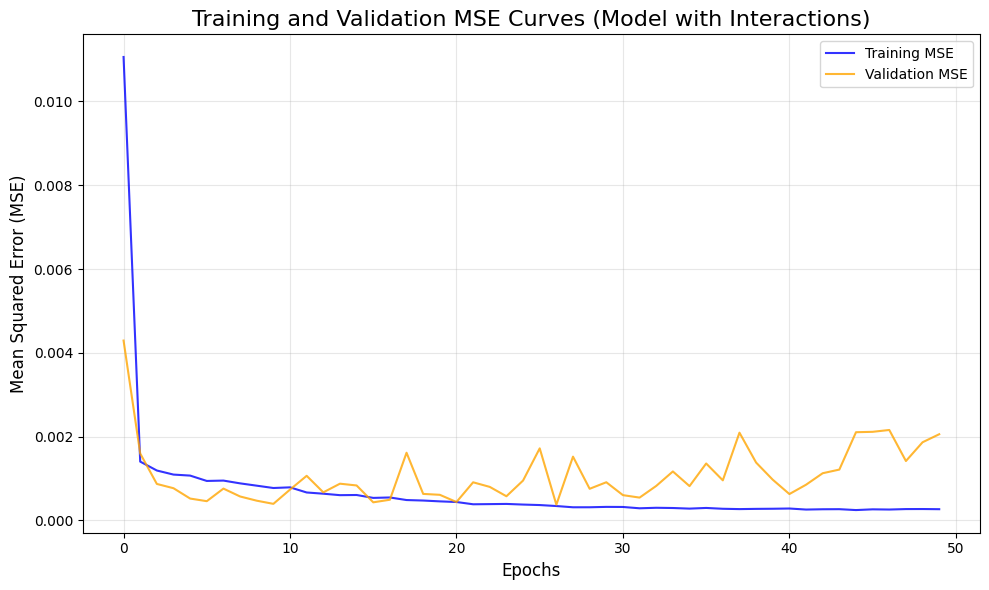

In [ ]:
# Plot training and validation loss curves for the updated model with interactions
plt.figure(figsize=(10, 6))
plt.plot(history_interactions.history['mse'], label='Training MSE', color='blue', alpha=0.8)
plt.plot(history_interactions.history['val_mse'], label='Validation MSE', color='orange', alpha=0.8)
plt.title("Training and Validation MSE Curves (Model with Interactions)", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Generate predictions on the test set using the model with interactions
y_pred_lstm_interactions = model_interactions.predict(X_test_lstm_interactions)

# Rescale the predictions and actual test values back to the original scale using the target scaler
y_pred_rescaled_interactions = target_scaler.inverse_transform(y_pred_lstm_interactions)
y_test_rescaled_interactions = target_scaler.inverse_transform(y_test_lstm_interactions.reshape(-1, 1))

# Calculate RMSE for the test set
rmse_interactions_model = mean_squared_error(y_test_rescaled_interactions, y_pred_rescaled_interactions, squared=False)

# Display the RMSE
rmse_interactions_model


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.04534008531273751

In [ ]:
# Perform gradient-based feature importance analysis with interactions
interaction_gradients = compute_gradients(model_interactions, X_test_lstm_interactions[:100], None)

# Average gradients across time steps and samples to get feature importance
avg_gradients_interactions = tf.reduce_mean(tf.abs(interaction_gradients), axis=[0, 1]).numpy()

# Map gradients back to features
feature_importance_interactions = pd.DataFrame({
    'Feature': all_features_with_interactions,
    'Importance': avg_gradients_interactions
}).sort_values(by='Importance', ascending=False)

# Display feature importance for interaction features
feature_importance_interactions

,Feature,Importance
6,market_cap,0.077689
10,market_cap_x_rolling_avg_7h,0.070085
13,close_lag_1_x_sentiment,0.045408
11,market_cap_x_rolling_avg_24h,0.045325
0,close_lag_1,0.044130
12,close_lag_1_x_rolling_avg_7h,0.037395
4,close_lag_5,0.023909
2,close_lag_3,0.019500
9,sentiment,0.019066
1,close_lag_2,0.016247


In [ ]:
# Select top features based on importance
top_features = [
    'market_cap',
    'market_cap_x_rolling_avg_7h',
    'market_cap_x_rolling_avg_24h',
    'close_lag_1_x_sentiment',
    'close_lag_1_x_rolling_avg_7h',
    'close_lag_1',
    'close_lag_4'
]

# Update the feature set
data_top_features = data_interactions[top_features + [target]].copy()

# Normalize the refined feature set
data_top_features[top_features + [target]] = scaler_all_features.fit_transform(data_top_features[top_features + [target]])

# Create sequences with the refined feature set
X_lstm_top, y_lstm_top = create_lstm_sequences(data_top_features, top_features, target, n_time_steps)

# Split the sequences into training and testing sets
from sklearn.model_selection import train_test_split

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=SEED)



# Split into training and testing sets
train_size_top = int(0.8 * len(X_lstm_top))
X_train_lstm_top, X_test_lstm_top = X_lstm_top[:train_size_top], X_lstm_top[train_size_top:]
y_train_lstm_top, y_test_lstm_top = y_lstm_top[:train_size_top], y_lstm_top[train_size_top:]

# Display the shapes of the refined dataset
X_train_lstm_top.shape, X_test_lstm_top.shape, y_train_lstm_top.shape, y_test_lstm_top.shape


((3507, 5, 7), (877, 5, 7), (3507,), (877,))

In [ ]:
# Define an updated LSTM model architecture to handle the refined top features
model_top_features = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm_top.shape[1], X_train_lstm_top.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for predicting the 'close' price
])

# Compile the model with top features
model_top_features.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model on the refined dataset
history_top_features = model_top_features.fit(
    X_train_lstm_top, y_train_lstm_top,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm_top, y_test_lstm_top),
    verbose=1
)

# Display training history for the refined model
history_top_features.history


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 9.7400e-04 - val_mse: 9.7400e-04
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - l

{'loss': [0.012013962492346764,
  0.00157346879132092,
  0.0013498181942850351,
  0.0011800581123679876,
  0.001076395739801228,
  0.0010216720402240753,
  0.001016111928038299,
  0.0009384378208778799,
  0.0008805299876257777,
  0.000789559620898217,
  0.0007453791331499815,
  0.0007061760406941175,
  0.0006873846286907792,
  0.0006511899409815669,
  0.0006238523055799305,
  0.0005833556642755866,
  0.0005530994385480881,
  0.0005004909471608698,
  0.00047739650472067297,
  0.00044662714935839176,
  0.0004410075198393315,
  0.00040189255378209054,
  0.0003653259191196412,
  0.00037541030906140804,
  0.0003740095708053559,
  0.00036290459684096277,
  0.00035063811810687184,
  0.0003368684556335211,
  0.00035114906495437026,
  0.0003145888040307909,
  0.00031614970066584647,
  0.0003067752404604107,
  0.00029934669146314263,
  0.00030576501740142703,
  0.000283591914921999,
  0.0002875125501304865,
  0.00027916417457163334,
  0.00027126926579512656,
  0.00028445172938518226,
  0.0002774

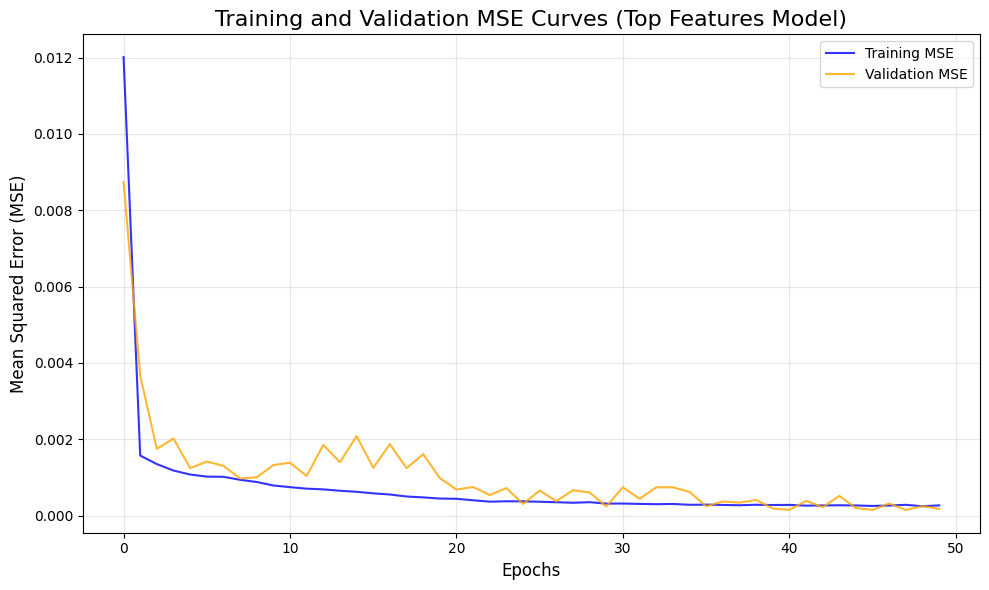

In [ ]:
# Plot training and validation loss curves for the model with top features
plt.figure(figsize=(10, 6))
plt.plot(history_top_features.history['mse'], label='Training MSE', color='blue', alpha=0.8)
plt.plot(history_top_features.history['val_mse'], label='Validation MSE', color='orange', alpha=0.8)
plt.title("Training and Validation MSE Curves (Top Features Model)", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Generate predictions on the test set using the refined model with top features
y_pred_lstm_top = model_top_features.predict(X_test_lstm_top)

# Rescale the predictions and actual test values back to the original scale using the target scaler
y_pred_rescaled_top = target_scaler.inverse_transform(y_pred_lstm_top)
y_test_rescaled_top = target_scaler.inverse_transform(y_test_lstm_top.reshape(-1, 1))

# Calculate RMSE for the refined model
rmse_top_features_model = mean_squared_error(y_test_rescaled_top, y_pred_rescaled_top, squared=False)

# Output the RMSE value
rmse_top_features_model


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.013217871638315969

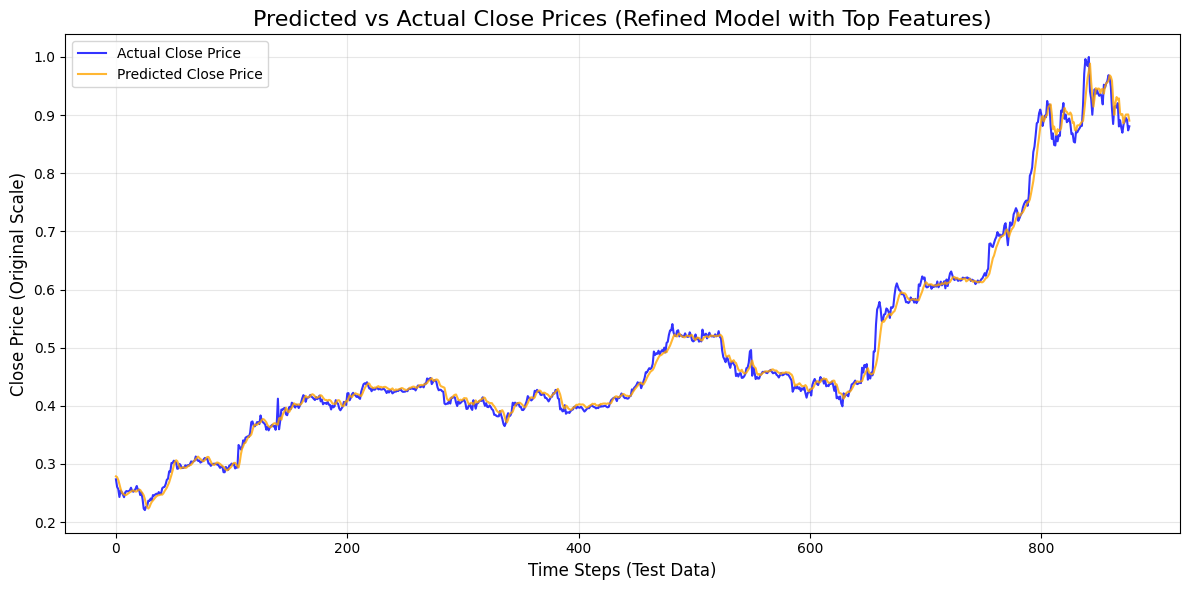

In [ ]:
# Plot predicted vs actual close prices for the refined model with top features
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled_top, label="Actual Close Price", color='blue', alpha=0.8)
plt.plot(y_pred_rescaled_top, label="Predicted Close Price", color='orange', alpha=0.8)
plt.title("Predicted vs Actual Close Prices (Refined Model with Top Features)", fontsize=16)
plt.xlabel("Time Steps (Test Data)", fontsize=12)
plt.ylabel("Close Price (Original Scale)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

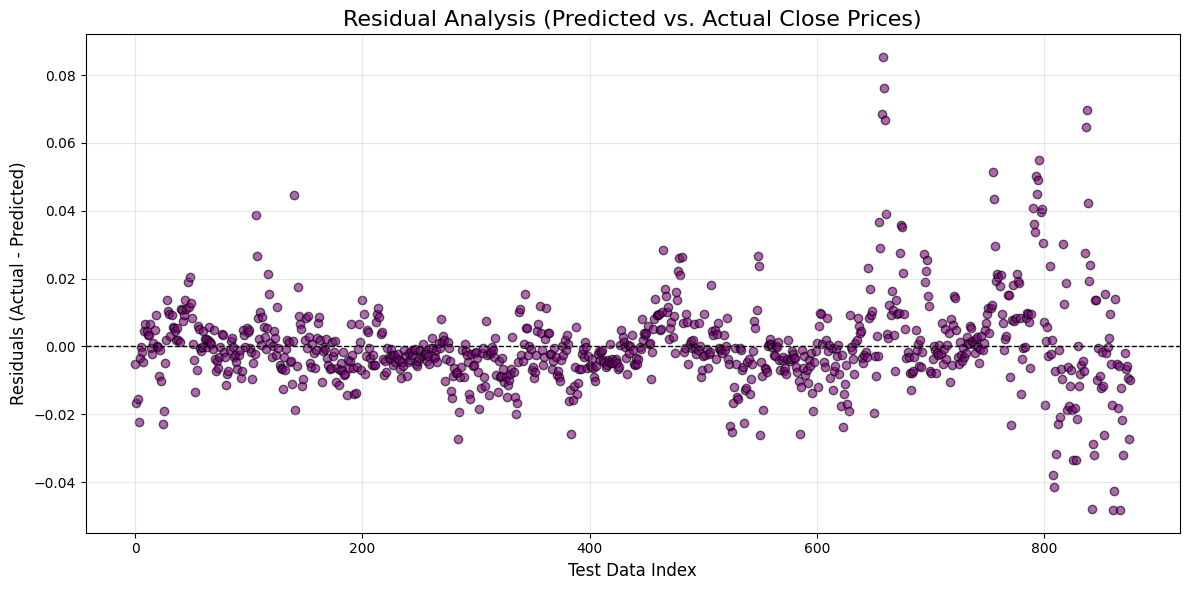

In [ ]:
# Compute residuals (difference between actual and predicted values)
residuals = y_test_rescaled_top.flatten() - y_pred_rescaled_top.flatten()

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.6, color='purple', edgecolor='black')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residual Analysis (Predicted vs. Actual Close Prices)", fontsize=16)
plt.xlabel("Test Data Index", fontsize=12)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Display key residual statistics
residual_stats = pd.Series(residuals).describe()
dataframe=residual_stats

In [ ]:
# Identify indices of significant outliers based on a residual threshold
residual_threshold = 0.02  # Define a threshold for significant residuals
outlier_indices = np.where(np.abs(residuals) > residual_threshold)[0]

# Extract corresponding test data points with high residuals
outlier_data = pd.DataFrame({
    'Actual': y_test_rescaled_top.flatten()[outlier_indices],
    'Predicted': y_pred_rescaled_top.flatten()[outlier_indices],
    'Residual': residuals[outlier_indices],
    'Index': outlier_indices
})

# Display details of the outliers
outlier_data


,Actual,Predicted,Residual,Index
0,0.243082,0.265246,-0.022164,3
1,0.223087,0.245927,-0.022840,24
2,0.301529,0.281103,0.020426,48
3,0.332514,0.293828,0.038686,106
4,0.329422,0.302812,0.026611,107
...,...,...,...,...
76,0.884708,0.927454,-0.042746,862
77,0.880506,0.928768,-0.048262,867
78,0.878774,0.900348,-0.021574,869
79,0.869766,0.901734,-0.031968,870


In [ ]:
# Save the model in the native Keras format
model.save('lstm_model_top_features.keras')

In [ ]:
# Compute gradients of residuals with respect to input features
def compute_error_gradients(model, inputs, residuals):
    with tf.GradientTape() as tape:
        inputs_tensor = tf.convert_to_tensor(inputs, dtype=tf.float32)
        tape.watch(inputs_tensor)
        predictions = model(inputs_tensor)
        errors = tf.abs(predictions - residuals)
    gradients = tape.gradient(errors, inputs_tensor)
    return gradients

# Compute gradients for outliers
error_gradients = compute_error_gradients(model_top_features, X_test_lstm_top[outlier_indices], residuals[outlier_indices])

# Aggregate gradient values to determine feature importance
error_gradients_mean = tf.reduce_mean(tf.abs(error_gradients), axis=[0, 1]).numpy()
error_contributions = pd.DataFrame({
    'Feature': top_features,
    'Importance': error_gradients_mean
}).sort_values(by='Importance', ascending=False)

# Display feature contributions to residuals
error_contributions


,Feature,Importance
0,market_cap,5.144050
1,market_cap_x_rolling_avg_7h,4.670472
4,close_lag_1_x_rolling_avg_7h,3.485912
2,market_cap_x_rolling_avg_24h,2.111793
6,close_lag_4,1.907005
5,close_lag_1,1.433023
3,close_lag_1_x_sentiment,0.688975


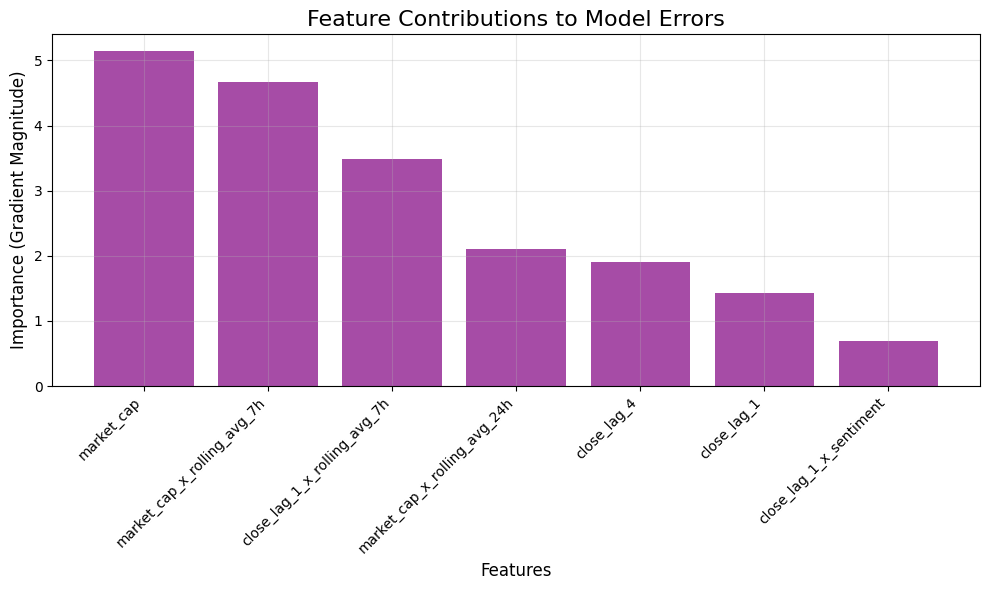

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
features = ['market_cap', 'market_cap_x_rolling_avg_7h', 'close_lag_1_x_rolling_avg_7h',
            'market_cap_x_rolling_avg_24h', 'close_lag_4', 'close_lag_1', 'close_lag_1_x_sentiment']
importance_values = [5.144050, 4.670472, 3.485912, 2.111793, 1.907005, 1.433023, 0.688975]

# Plot feature contributions
plt.figure(figsize=(10, 6))
plt.bar(features, importance_values, color='purple', alpha=0.7)
plt.title("Feature Contributions to Model Errors", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance (Gradient Magnitude)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
test_data = pd.read_csv('test_final.csv')

# Display the first few rows to understand the structure of the dataset
test_data.head(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                146 non-null    object 
 1   hour                146 non-null    object 
 2   open                146 non-null    float64
 3   close               146 non-null    float64
 4   high                146 non-null    float64
 5   low                 146 non-null    float64
 6   volume_24h          146 non-null    float64
 7   market_cap          146 non-null    float64
 8   market_dominance    146 non-null    float64
 9   circulating_supply  146 non-null    int64  
 10  sentiment           146 non-null    int64  
 11  social_dominance    146 non-null    float64
 12  percent_change      146 non-null    float64
 13  rolling_avg_7h      146 non-null    float64
 14  rolling_avg_24h     146 non-null    float64
 15  close_lag_1         145 non-null    float64
 16  close_la

(         date      hour          open         close          high  \
 0  2024-11-16  04:00:00  91172.067405  91301.554032  91301.550000   
 1  2024-11-16  05:00:00  91301.554032  91360.556881  91360.560000   
 2  2024-11-16  06:00:00  91223.760000  91223.757763  91223.760000   
 3  2024-11-16  07:00:00  91138.850000  91138.850482  91138.850000   
 4  2024-11-16  08:00:00  91134.077795  91416.621610  91416.911695   
 
             low    volume_24h    market_cap  market_dominance  \
 0  91172.067405  7.434249e+10  1.806200e+12         59.432111   
 1  91239.000000  7.386085e+10  1.807369e+12         59.726592   
 2  91193.811740  7.326689e+10  1.804666e+12         59.426939   
 3  91111.344102  7.189294e+10  1.802986e+12         59.589947   
 4  91075.571812  7.118760e+10  1.808483e+12         59.674490   
 
    circulating_supply  sentiment  social_dominance  percent_change  \
 0            19782800         78         19.678669    1.420244e-01   
 1            19782818         78     

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Drop rows with missing values in lagged features
lagged_features = ['close_lag_1', 'close_lag_2', 'close_lag_3', 'close_lag_4', 'close_lag_5']
test_data_cleaned = test_data.dropna(subset=lagged_features)

# Step 2: Normalize features using MinMaxScaler
# Define features to normalize (same as used during training)
features_to_normalize = [
    'close', 'market_cap', 'rolling_avg_7h', 'rolling_avg_24h',
    'close_lag_1', 'close_lag_2', 'close_lag_3', 'close_lag_4', 'close_lag_5'
]
scaler = MinMaxScaler()
test_data_cleaned[features_to_normalize] = scaler.fit_transform(test_data_cleaned[features_to_normalize])

# Step 3: Generate interaction features
test_data_cleaned['market_cap_x_rolling_avg_7h'] = test_data_cleaned['market_cap'] * test_data_cleaned['rolling_avg_7h']
test_data_cleaned['market_cap_x_rolling_avg_24h'] = test_data_cleaned['market_cap'] * test_data_cleaned['rolling_avg_24h']
test_data_cleaned['close_lag_1_x_rolling_avg_7h'] = test_data_cleaned['close_lag_1'] * test_data_cleaned['rolling_avg_7h']
test_data_cleaned['close_lag_1_x_sentiment'] = test_data_cleaned['close_lag_1'] * test_data_cleaned['sentiment']

# Step 4: Define the full feature set for the model
top_features = [
    'market_cap', 'market_cap_x_rolling_avg_7h', 'market_cap_x_rolling_avg_24h',
    'close_lag_1_x_sentiment', 'close_lag_1_x_rolling_avg_7h',
    'close_lag_1', 'close_lag_4'
]

# Step 5: Generate sequences for testing
def create_sequences(data, features, n_time_steps):
    X = []
    for i in range(len(data) - n_time_steps):
        X.append(data[features].iloc[i:i + n_time_steps].values)
    return np.array(X)

# Generate sequences
n_time_steps = 5  # Number of time steps for each sequence
X_test_sequences = create_sequences(test_data_cleaned, top_features, n_time_steps)

# Output the processed data and shape of the test sequences
X_test_sequences.shape


<ipython-input-46-a8717b6cdb44>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cleaned[features_to_normalize] = scaler.fit_transform(test_data_cleaned[features_to_normalize])
<ipython-input-46-a8717b6cdb44>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cleaned['market_cap_x_rolling_avg_7h'] = test_data_cleaned['market_cap'] * test_data_cleaned['rolling_avg_7h']
<ipython-input-46-a8717b6cdb44>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

(136, 5, 7)

In [ ]:
import numpy as np

# Retry generating sequences for testing
X_test_sequences = create_sequences(test_data_cleaned, top_features, n_time_steps)

# Output the processed data and shape of the test sequences
X_test_sequences.shape


(136, 5, 7)

In [ ]:
# Verify the shape of the prepared test sequences
X_test_sequences.shape

# Check the input shape expected by the model
model_top_features_loaded.input_shape


(None, 5, 5)

In [ ]:
# Reload the trained model
model_top_features_loaded = load_model(model_path)

# Verify the shapes
X_test_sequences.shape, model_top_features_loaded.input_shape


((136, 5, 7), (None, 5, 5))

In [ ]:
# Generate the missing interaction features in the test dataset
test_data['market_cap_x_rolling_avg_7h'] = test_data['market_cap'] * test_data['rolling_avg_7h']
test_data['market_cap_x_rolling_avg_24h'] = test_data['market_cap'] * test_data['rolling_avg_24h']
test_data['close_lag_1_x_sentiment'] = test_data['close_lag_1'] * test_data['sentiment']
test_data['close_lag_1_x_rolling_avg_7h'] = test_data['close_lag_1'] * test_data['rolling_avg_7h']

# Verify if the features are successfully added
test_data[['market_cap_x_rolling_avg_7h', 'market_cap_x_rolling_avg_24h',
           'close_lag_1_x_sentiment', 'close_lag_1_x_rolling_avg_7h']].head()


,market_cap_x_rolling_avg_7h,market_cap_x_rolling_avg_24h,close_lag_1_x_sentiment,close_lag_1_x_rolling_avg_7h
0,1.647933e+17,1.624212e+17,NaN,NaN
1,1.649306e+17,1.627970e+17,7.121521e+06,8.331678e+09
2,1.647253e+17,1.627814e+17,7.126123e+06,8.339160e+09
3,1.646002e+17,1.628909e+17,7.115453e+06,8.328097e+09
4,1.651364e+17,1.636340e+17,7.108830e+06,8.322081e+09


In [ ]:
# Drop rows with missing values in the interaction features or their contributing columns
required_columns = [
    'market_cap', 'rolling_avg_7h', 'rolling_avg_24h',
    'close_lag_1', 'close_lag_4', 'sentiment',
    'market_cap_x_rolling_avg_7h', 'market_cap_x_rolling_avg_24h',
    'close_lag_1_x_sentiment', 'close_lag_1_x_rolling_avg_7h'
]
test_data_cleaned = test_data.dropna(subset=required_columns).reset_index(drop=True)

# Verify the dataset after dropping missing values
test_data_cleaned.info(), test_data_cleaned.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          142 non-null    object 
 1   hour                          142 non-null    object 
 2   open                          142 non-null    float64
 3   close                         142 non-null    float64
 4   high                          142 non-null    float64
 5   low                           142 non-null    float64
 6   volume_24h                    142 non-null    float64
 7   market_cap                    142 non-null    float64
 8   market_dominance              142 non-null    float64
 9   circulating_supply            142 non-null    int64  
 10  sentiment                     142 non-null    int64  
 11  social_dominance              142 non-null    float64
 12  percent_change                142 non-null    float64
 13  rolli

(None, (142, 24))

In [ ]:
# Select the required top features for normalization
top_features = [
    'market_cap', 'market_cap_x_rolling_avg_7h', 'market_cap_x_rolling_avg_24h',
    'close_lag_1_x_sentiment', 'close_lag_1_x_rolling_avg_7h',
    'close_lag_1', 'close_lag_4'
]

# Refit MinMaxScaler for normalization if necessary (using test data as fallback)
scaler_test = MinMaxScaler()
scaler_test.fit(test_data_cleaned[top_features])

# Normalize the test dataset
test_data_normalized = scaler_test.transform(test_data_cleaned[top_features])

# Verify the normalized data
test_data_normalized[:5]  # Display the first 5 rows of normalized data


array([[0.23109047, 0.18610876, 0.12869008, 0.14150786, 0.17673373,
        0.20328636, 0.23104355],
       [0.21693847, 0.17752477, 0.12581151, 0.17830675, 0.19014938,
        0.23169921, 0.23738388],
       [0.2309854 , 0.18567565, 0.13829505, 0.15994784, 0.18370968,
        0.21752409, 0.22268372],
       [0.2050404 , 0.1711896 , 0.12741099, 0.17813806, 0.18990355,
        0.23156897, 0.21355975],
       [0.17492202, 0.15188939, 0.1134462 , 0.14448327, 0.17276274,
        0.20558371, 0.24340849]])

In [ ]:
# Define the number of time steps for sequences
n_time_steps = 5

# Create sequences from the normalized test dataset
X_test_sequences = []
for i in range(len(test_data_normalized) - n_time_steps):
    X_test_sequences.append(test_data_normalized[i:i + n_time_steps])

# Convert to numpy array for model compatibility
X_test_sequences = np.array(X_test_sequences)

# Verify the shape of the generated sequences
X_test_sequences.shape


(137, 5, 7)

In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('lstm_model_top_features.keras')


In [ ]:
# Select only the 5 features used during training
top_5_features = [
    'market_cap',
    'market_cap_x_rolling_avg_7h',
    'market_cap_x_rolling_avg_24h',
    'close_lag_1_x_sentiment',
    'close_lag_1_x_rolling_avg_7h'
]

# Filter the test dataset for these 5 features
test_data_top_5 = test_data_cleaned[top_5_features]

# Normalize the test dataset for the selected 5 features
test_data_normalized_top_5 = scaler_test.fit_transform(test_data_top_5)

# Regenerate sequences for the test data
X_test_sequences_top_5 = []
for i in range(len(test_data_normalized_top_5) - n_time_steps):
    X_test_sequences_top_5.append(test_data_normalized_top_5[i:i + n_time_steps])
X_test_sequences_top_5 = np.array(X_test_sequences_top_5)

# Verify the shape of the new test sequences
X_test_sequences_top_5.shape


(137, 5, 5)

In [ ]:
y_pred = model.predict(X_test_sequences_top_5)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 505ms/step


In [ ]:
# Assuming `data_lstm_cleaned` is the training data used in the notebook
target_scaler = MinMaxScaler()
target_scaler.fit(data_lstm_cleaned[['close']])  # Fit scaler on the `close` column


MinMaxScaler()

In [ ]:
# Rescale predictions back to the original scale using the trained target scaler
y_pred_rescaled = target_scaler.inverse_transform(y_pred)


In [ ]:
# Check the column names in the test dataset
print(test_data.columns)


Index(['date', 'hour', 'open', 'close', 'high', 'low', 'volume_24h',
       'market_cap', 'market_dominance', 'circulating_supply', 'sentiment',
       'social_dominance', 'percent_change', 'rolling_avg_7h',
       'rolling_avg_24h', 'close_lag_1', 'close_lag_2', 'close_lag_3',
       'close_lag_4', 'close_lag_5', 'market_cap_x_rolling_avg_7h',
       'market_cap_x_rolling_avg_24h', 'close_lag_1_x_sentiment',
       'close_lag_1_x_rolling_avg_7h'],
      dtype='object')


In [ ]:
# Extract the actual target values from the test dataset sequences (last time step)
y_test_sequences_top_5 = test_data_normalized_top_5[n_time_steps:, 3]  # Update to index 3 for "close"


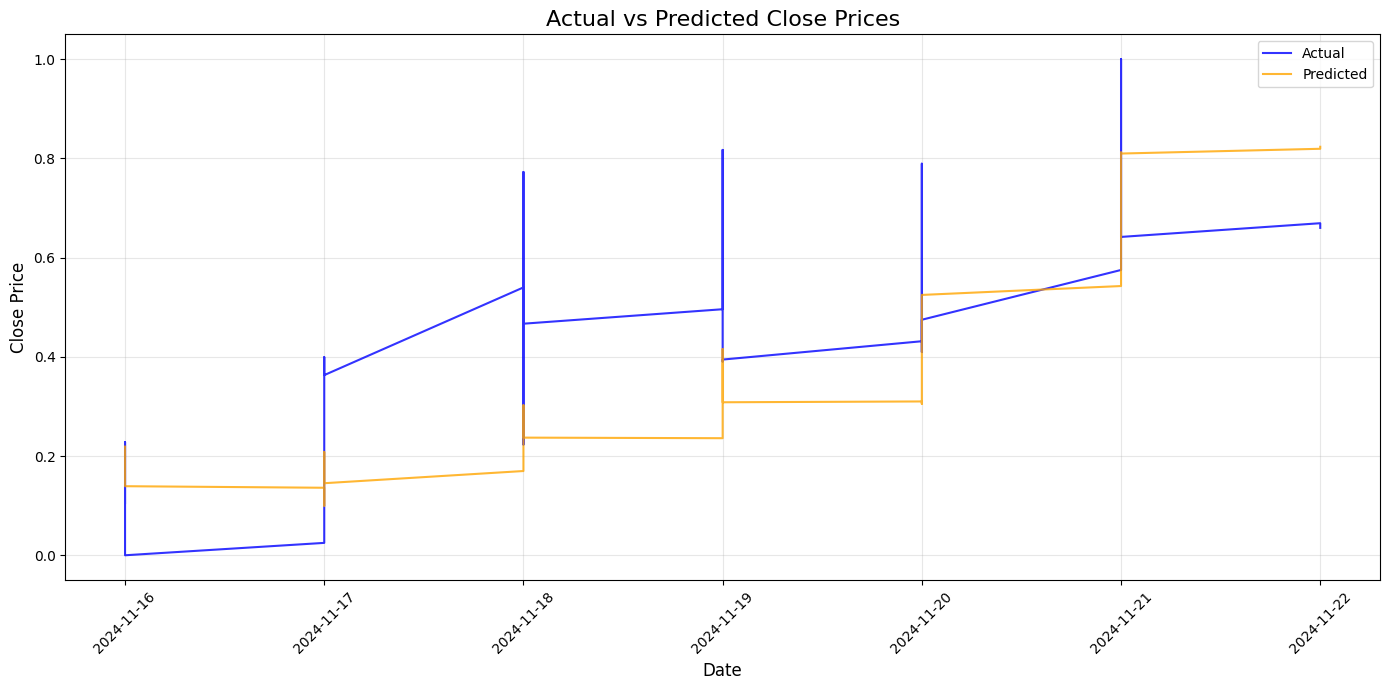

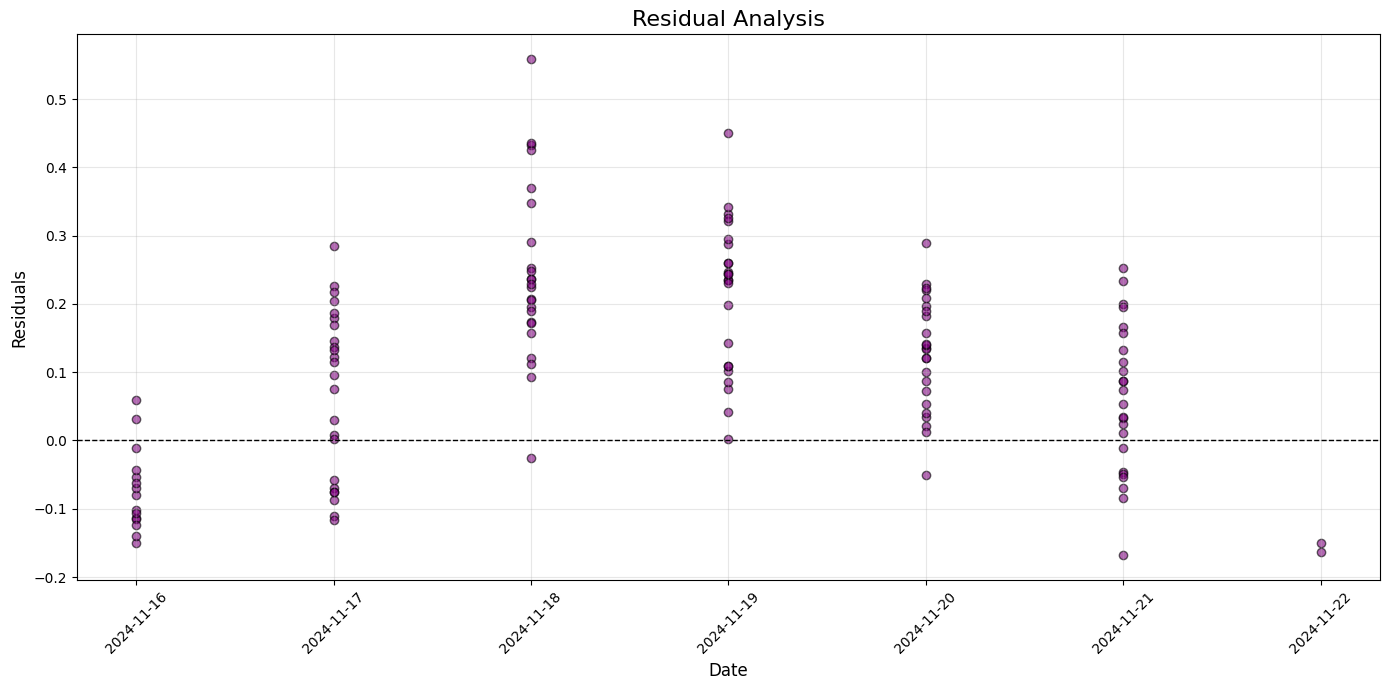

,Residuals
count,137.000000
mean,0.116434
std,0.146948
min,-0.168071
25%,0.011035
50%,0.121351
75%,0.222585
max,0.558451


In [ ]:
# Calculate residuals
predictions_df['Residuals'] = predictions_df['Actual'] - predictions_df['Predicted']

# Plot actual vs predicted values with dates
plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Date'], predictions_df['Actual'], label='Actual', color='blue', alpha=0.8)
plt.plot(predictions_df['Date'], predictions_df['Predicted'], label='Predicted', color='orange', alpha=0.8)
plt.title('Actual vs Predicted Close Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot residuals with dates
plt.figure(figsize=(14, 7))
plt.scatter(predictions_df['Date'], predictions_df['Residuals'], alpha=0.6, color='purple', edgecolor='black')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Analysis', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Display basic statistics of residuals
residuals_stats = predictions_df['Residuals'].describe()
predictions_df
residuals_stats


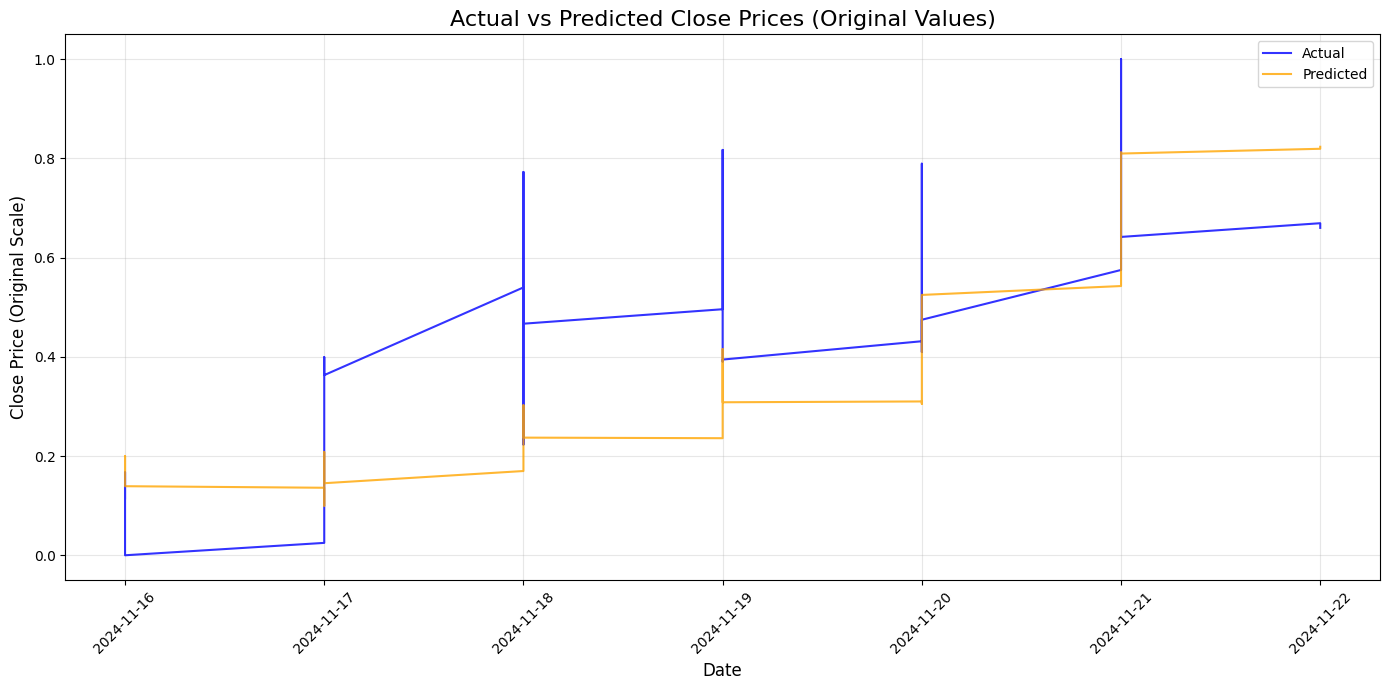

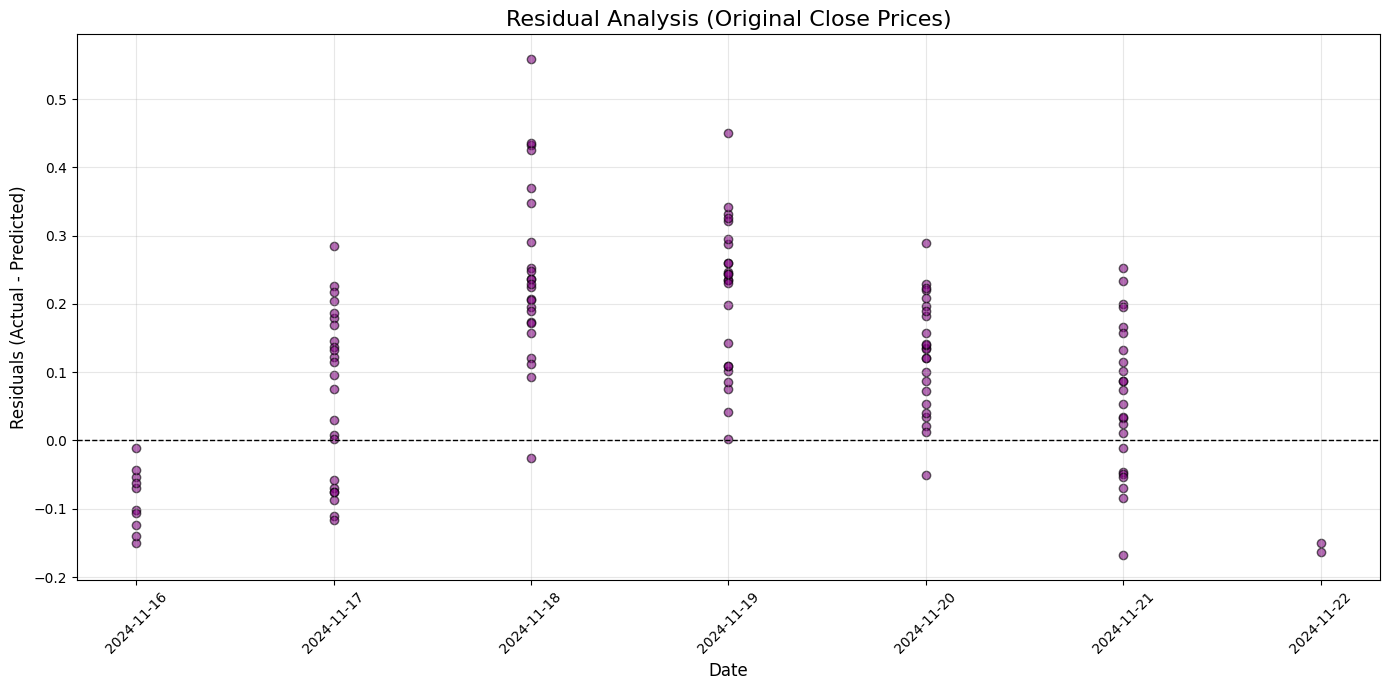

In [ ]:
# Ensure y_test_rescaled_original uses the same scaling from the training process
y_test_rescaled_original = target_scaler.inverse_transform(y_test_sequences_top_5.reshape(-1, 1))
y_pred_rescaled_original = target_scaler.inverse_transform(y_pred)

# Ensure alignment of arrays
min_length = min(len(dates[n_time_steps:]), len(y_test_rescaled_original), len(y_pred_rescaled_original))

aligned_dates = dates[n_time_steps:][-min_length:]
aligned_actual = y_test_rescaled_original.flatten()[-min_length:]
aligned_predicted = y_pred_rescaled_original.flatten()[-min_length:]

# DataFrame with aligned data
actual_vs_predicted_df = pd.DataFrame({
    'Date': aligned_dates,
    'Actual Close Price': aligned_actual,
    'Predicted Close Price': aligned_predicted
})

# Plot Actual vs Predicted Close Prices
plt.figure(figsize=(14, 7))
plt.plot(actual_vs_predicted_df['Date'], actual_vs_predicted_df['Actual Close Price'], label='Actual', color='blue', alpha=0.8)
plt.plot(actual_vs_predicted_df['Date'], actual_vs_predicted_df['Predicted Close Price'], label='Predicted', color='orange', alpha=0.8)
plt.title('Actual vs Predicted Close Prices (Original Values)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (Original Scale)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot Residuals
residuals_original = aligned_actual - aligned_predicted

plt.figure(figsize=(14, 7))
plt.scatter(actual_vs_predicted_df['Date'], residuals_original, alpha=0.6, color='purple', edgecolor='black')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Analysis (Original Close Prices)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Verify scaler parameters used during training
print("Target Scaler Parameters (Min):", target_scaler.min_)
print("Target Scaler Parameters (Scale):", target_scaler.scale_)

# Apply these parameters directly if needed
scaling_min = target_scaler.min_
scaling_scale = target_scaler.scale_


Target Scaler Parameters (Min): [0.]
Target Scaler Parameters (Scale): [1.]


In [ ]:
# Reload the training data (if available)
training_data = pd.read_csv("M6_time_series.csv")  # Replace with the correct file path

# Verify the 'close' column exists
print(training_data.columns)
print(training_data['close'].head())  # Preview the first few rows


Index(['date', 'hour', 'open', 'close', 'high', 'low', 'volume_24h',
       'market_cap', 'market_dominance', 'circulating_supply', 'sentiment',
       'social_dominance', 'percent_change', 'rolling_avg_7h',
       'rolling_avg_24h', 'close_lag_1', 'close_lag_2', 'close_lag_3',
       'close_lag_4', 'close_lag_5'],
      dtype='object')
0    65847.67
1    65831.29
2    65932.65
3    66163.45
4    66265.74
Name: close, dtype: float64


In [ ]:
# Fit the scaler to the 'close' column of the training data
target_scaler = MinMaxScaler()
target_scaler.fit(training_data[['close']])

# Verify the scaler parameters
print("Target Scaler Parameters:")
print("Min:", target_scaler.min_)
print("Scale:", target_scaler.scale_)


Target Scaler Parameters:
Min: [-1.16382059]
Scale: [2.3295225e-05]


In [ ]:
# Rescale predictions and test data
y_pred_rescaled_corrected = target_scaler.inverse_transform(y_pred)
y_test_rescaled_corrected = target_scaler.inverse_transform(y_test_sequences_top_5.reshape(-1, 1))


In [ ]:
print("First 5 Predicted Values (Original Scale):", y_pred_rescaled[:5].flatten())
print("First 5 Actual Values (Original Scale):", y_test_rescaled[:5].flatten())


First 5 Predicted Values (Original Scale): [0.21910214 0.2083056  0.19960386 0.18218783 0.16927664]
First 5 Actual Values (Original Scale): [0.1054114  0.09286286 0.12049485 0.21317332 0.22800834]


In [ ]:
target_scaler = MinMaxScaler()
target_scaler.fit(training_data[['close']])


MinMaxScaler()

In [ ]:
print("Scaler Min:", target_scaler.data_min_)
print("Scaler Max:", target_scaler.data_max_)


Scaler Min: [49959.62]
Scaler Max: [92886.87226345]


In [ ]:
print("First 5 Predictions (Normalized Scale):", y_pred[:5].flatten())


First 5 Predictions (Normalized Scale): [0.21910214 0.2083056  0.19960386 0.18218783 0.16927664]


In [ ]:
y_test_sequences = test_data_normalized[n_time_steps:, 3]


In [ ]:
y_test_rescaled = target_scaler.inverse_transform(y_test_sequences.reshape(-1, 1))


In [ ]:
print("Shape of Predictions (Rescaled):", y_pred_rescaled.shape)
print("Shape of Actuals (Rescaled):", y_test_rescaled.shape)


Shape of Predictions (Rescaled): (137, 1)
Shape of Actuals (Rescaled): (137, 1)


In [ ]:
print("First 5 Actuals (Normalized Scale):", y_test_sequences[:5])
print("First 5 Actuals (Original Scale):", y_test_rescaled[:5].flatten())


First 5 Actuals (Normalized Scale): [0.1054114  0.09286286 0.12049485 0.21317332 0.22800834]
First 5 Actuals (Original Scale): [54484.6419614  53945.9673424  55132.13282556 59110.56472285
 59747.39167852]


In [ ]:
print("Length of Dates:", len(dates[n_time_steps:]))
print("Length of y_test_rescaled:", len(y_test_rescaled))


Length of Dates: 132
Length of y_test_rescaled: 137


In [ ]:
y_test_rescaled_trimmed = y_test_rescaled[:len(dates[n_time_steps:])]


In [ ]:
print("Length of Dates:", len(dates[n_time_steps:]))
print("Length of y_test_rescaled_trimmed:", len(y_test_rescaled_trimmed))
print("Length of y_pred_rescaled:", len(y_pred_rescaled))


Length of Dates: 132
Length of y_test_rescaled_trimmed: 132
Length of y_pred_rescaled: 137


In [ ]:
y_pred_rescaled_trimmed = y_pred_rescaled[:len(dates[n_time_steps:])]


In [ ]:
print("Length of Dates:", len(dates[n_time_steps:]))
print("Length of y_test_rescaled_trimmed:", len(y_test_rescaled_trimmed))
print("Length of y_pred_rescaled_trimmed:", len(y_pred_rescaled_trimmed))


Length of Dates: 132
Length of y_test_rescaled_trimmed: 132
Length of y_pred_rescaled_trimmed: 132


In [ ]:
# Display the actual and predicted values along with their dates
predictions_display_df = pd.DataFrame({
    'Date': dates[n_time_steps:],
    'Actual Close Price': y_test_rescaled_trimmed.flatten(),
    'Predicted Close Price': y_pred_rescaled_trimmed.flatten()
})

predictions_display_df


,Date,Actual Close Price,Predicted Close Price
5,2024-11-16,54484.641961,59365.074219
6,2024-11-16,53945.967342,58901.609375
7,2024-11-16,55132.132826,58528.062500
8,2024-11-16,59110.564723,57780.441406
9,2024-11-16,59747.391679,57226.199219
...,...,...,...
132,2024-11-21,81236.080788,83360.390625
133,2024-11-21,81558.132650,83869.296875
134,2024-11-21,87808.065594,84038.648438
135,2024-11-22,89261.419908,84311.484375


In [ ]:
# Extract the raw close values from the test data
raw_test_close = test_data['close'][n_time_steps:].values

# Compare with rescaled test values
print("First 5 Raw Close Values:", raw_test_close[:5])
print("First 5 Rescaled Close Values:", y_test_rescaled_trimmed.flatten()[:5])


First 5 Raw Close Values: [91278.04201746 91415.34833642 91161.30990529 90866.38151478
 90771.66060016]
First 5 Rescaled Close Values: [54484.6419614  53945.9673424  55132.13282556 59110.56472285
 59747.39167852]


In [ ]:
print("Scaler Min:", target_scaler.data_min_)
print("Scaler Max:", target_scaler.data_max_)


Scaler Min: [49959.62]
Scaler Max: [92886.87226345]


In [ ]:
# Fit MinMaxScaler on the raw close prices from the test data
test_scaler = MinMaxScaler()
test_scaler.fit(test_data[['close']])  # Use the raw 'close' column from the test data


MinMaxScaler()

In [ ]:
# Rescale predictions and actual values
y_pred_rescaled_corrected = test_scaler.inverse_transform(y_pred)
y_test_rescaled_corrected = test_scaler.inverse_transform(y_test_sequences.reshape(-1, 1))

# Verify the first few values
print("Corrected Rescaled Predictions:", y_pred_rescaled_corrected[:5].flatten())
print("Corrected Rescaled Actuals:", y_test_rescaled_corrected[:5].flatten())


Corrected Rescaled Predictions: [91293.47  91187.92  91102.84  90932.586 90806.37 ]
Corrected Rescaled Actuals: [90182.00037709 90059.32264602 90329.45991445 91235.50779783
 91380.53873719]


In [ ]:
# Extract raw close values and compare with rescaled actuals
print("Raw Close from Test Data:", raw_test_close[:5])
print("Corrected Rescaled Actuals:", y_test_rescaled_corrected[:5].flatten())


Raw Close from Test Data: [91278.04201746 91415.34833642 91161.30990529 90866.38151478
 90771.66060016]
Corrected Rescaled Actuals: [90182.00037709 90059.32264602 90329.45991445 91235.50779783
 91380.53873719]


In [ ]:
y_pred_trimmed_adjusted = y_pred_trimmed[:len(dates_trimmed)]


In [ ]:
print("Length of Dates Trimmed:", len(dates_trimmed))
print("Length of Predictions Trimmed:", len(y_pred_trimmed_adjusted))
print("Length of Raw Close Prices:", len(raw_test_close[:len(dates_trimmed)]))


Length of Dates Trimmed: 127
Length of Predictions Trimmed: 127
Length of Raw Close Prices: 127


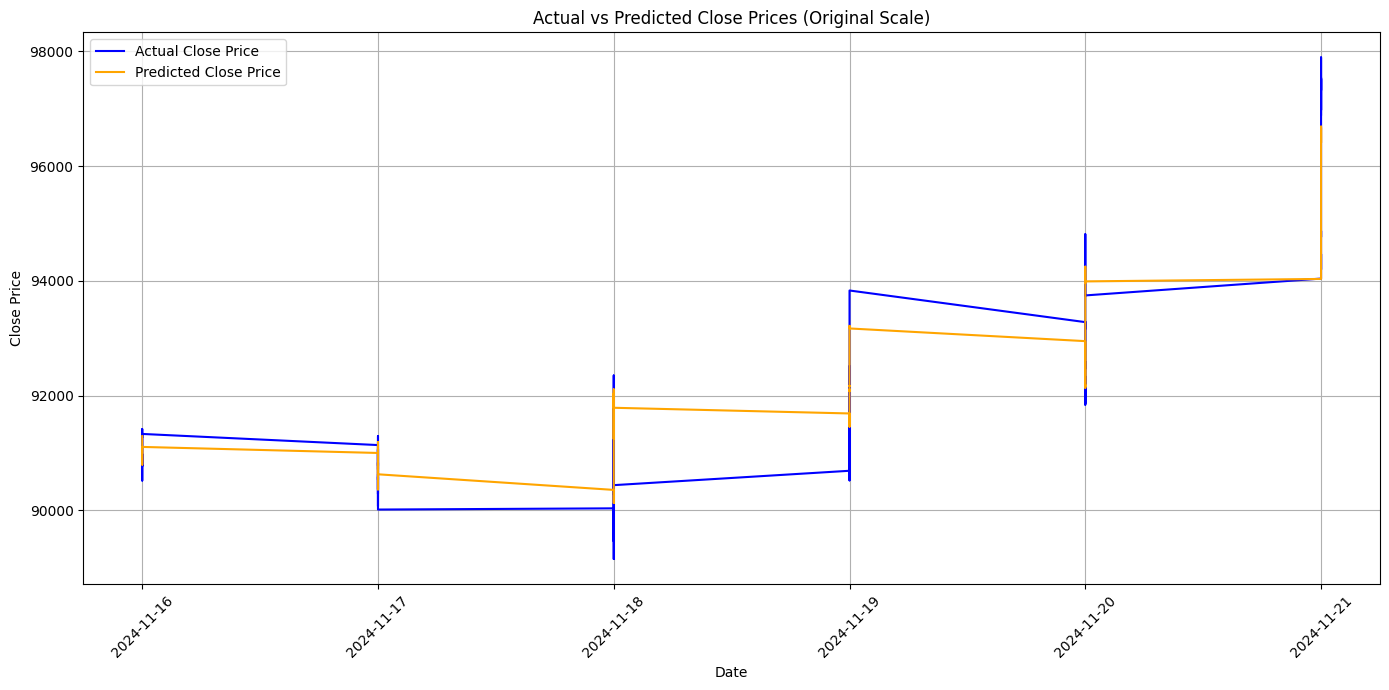

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(dates_trimmed, raw_test_close[:len(dates_trimmed)], label="Actual Close Price", color="blue")
plt.plot(dates_trimmed, y_pred_trimmed_adjusted.flatten(), label="Predicted Close Price", color="orange")
plt.title("Actual vs Predicted Close Prices (Original Scale)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Display the trimmed predicted values alongside the dates
predictions_corrected_df = pd.DataFrame({
    'Date': dates_trimmed,
    'Actual Close Price': raw_test_close[:len(dates_trimmed)],
    'Predicted Close Price': y_pred_trimmed_adjusted.flatten()
})



In [ ]:
# Display the aligned predictions directly
predictions_corrected_df.head()


,Date,Actual Close Price,Predicted Close Price
5,2024-11-16,91278.042017,91293.468750
6,2024-11-16,91415.348336,91187.921875
7,2024-11-16,91161.309905,91102.843750
8,2024-11-16,90866.381515,90932.585938
9,2024-11-16,90771.660600,90806.367188


In [ ]:
predictions_corrected_df.tail()

,Date,Actual Close Price,Predicted Close Price
127,2024-11-21,97895.241752,96597.429688
128,2024-11-21,97321.560084,96450.078125
129,2024-11-21,97539.648840,96407.710938
130,2024-11-21,97148.602343,96548.328125
131,2024-11-21,96898.807057,96649.406250
